# Investigating Stratification Index for the Years 1993-2013


The Stratification Index, $SI$, presented here is the $SI$ averaged over the area bounded by:
    
    Lat. 42 - 42.5 N
    Long. 4.25 - 5 E
    
The deep convection years are:
    
    1999, 2000, 2005, 2009, 2011, 2012, 2013

## Data

In [6]:
import pickle
from glob import glob

data_paths = []
data_paths.append(glob('../data/GOL5/N-CONT*SI.pickle'))
data_paths.append(glob('../data/GOL5/N-SEAS*SI.pickle'))

for i, data_path in enumerate(data_paths):
    data_paths[i].sort()

data = []

for data_path in data_paths:
    data.append([])
    for path in data_path:
        with open(path, 'rb') as file:
            data[-1].append(pickle.load(file))

with open('../data/mistral_attributes.pickle', 'rb') as file:
    mistral_data = pickle.load(file)

## Analysis

In [73]:
import numpy as np
from datetime import datetime, timedelta

dc_years = np.array([1999, 2000, 2005, 2009, 2011, 2012, 2013])
years = np.arange(1994, 2014)

ind_dc = []
dyears = []
for i, year in enumerate(years):
    if year in dc_years:
        ind_dc.append(i)

    dyears.append(datetime(year=year, month=1, day=1))

ind_dc = np.array(ind_dc)
dyears = np.array(dyears)

si_init = []  # initial SI
si_max = []  # max control SI
si_s_max = []  # max seasonal SI
si_min = []  # min control SI
si_s_min = []  # min seasonal SI

dsi_dc = []  # delta SI at time of deep convection
si_s_dc = []  # seasonal SI at time of deep convection

dc_aft = []  # deep convection after seasonal SI minimum
dc_tog = []  # deep convection with seasonal SI minimum occurring about the same time
dc_bef = []  # deep convection before seasonal SI minimum

for i, (cont, seas) in enumerate(zip(data[0], data[1])):
    
    si_init.append(cont['si'][0])

    si_max.append(np.max(cont['si']))
    si_s_max.append(np.max(seas['si']))

    si_min.append(np.min(cont['si']))
    si_s_min.append(np.min(seas['si']))

    dc_ind = cont['si'].argmin()
    si_s_ind = seas['si'].argmin()

    # determining before, after, or simultaneous destratification for delta SI and seasonal SI
    if dc_ind > si_s_ind:
        dc_aft.append(True)
        dc_tog.append(False)
        dc_bef.append(False)

    elif dc_ind == si_s_ind:
        dc_aft.append(False)
        dc_tog.append(True)
        dc_bef.append(False)
        
    else:
        dc_aft.append(False)
        dc_tog.append(False)
        dc_bef.append(True)

    dsi_dc.append(cont['si'][dc_ind]-seas['si'][dc_ind])
    si_s_dc.append(seas['si'][dc_ind])

si_init = np.array(si_init)

si_s_max = np.array(si_s_max)

si_max = np.array(si_max)
si_min = np.array(si_min)

dsi_dc = np.array(dsi_dc)
si_s_dc = np.array(si_s_dc)

## Plots

### $SI$

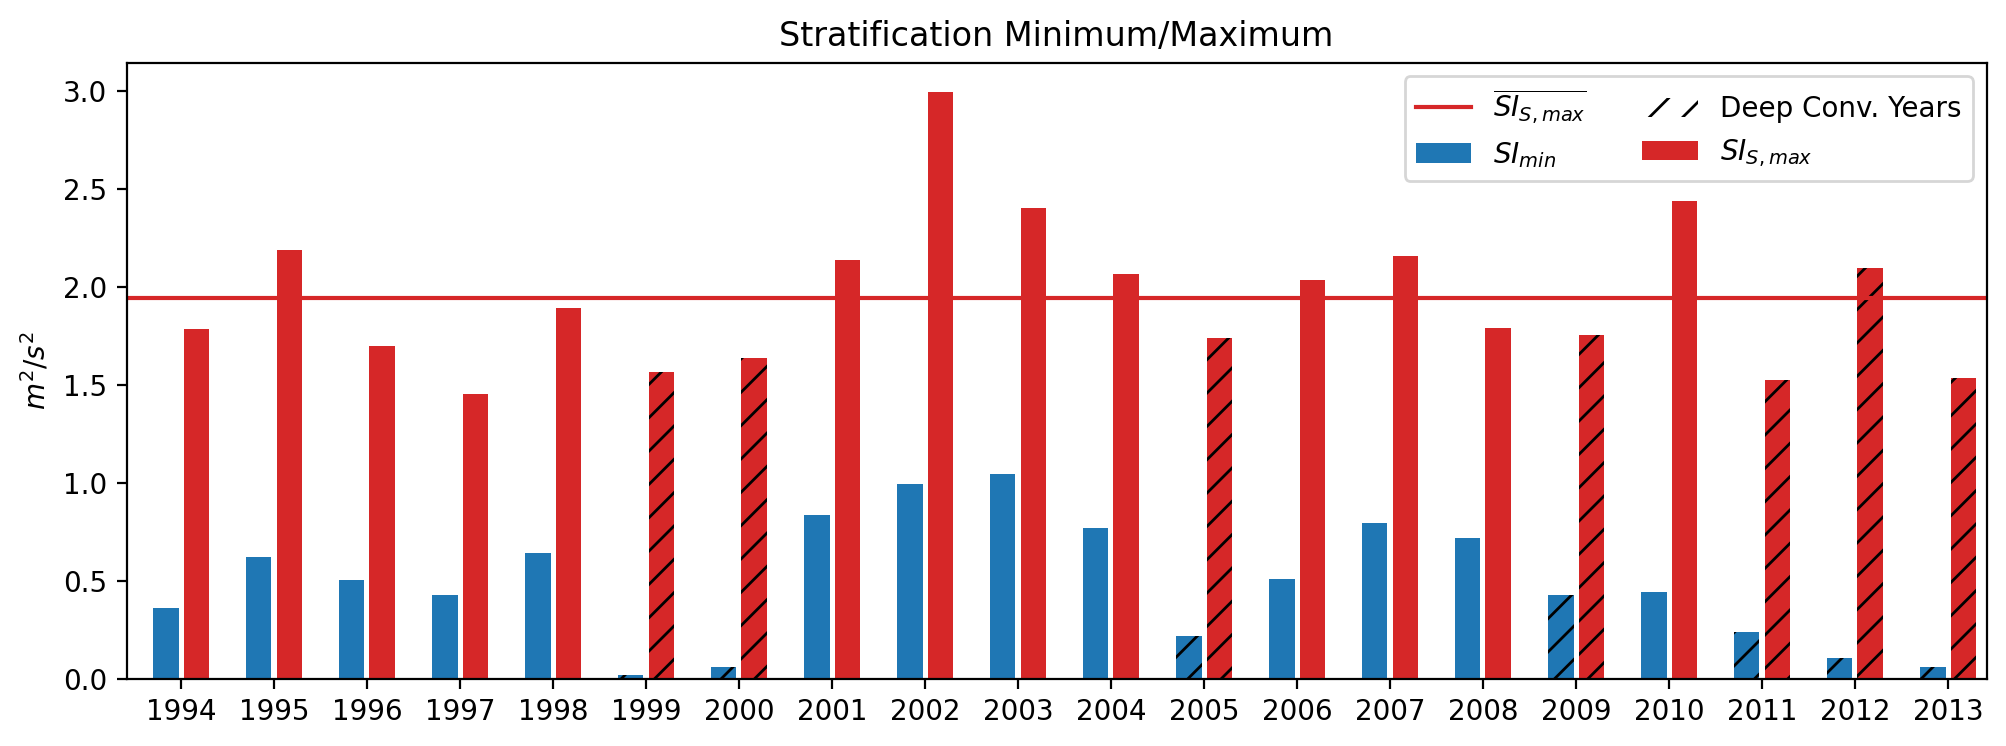

In [157]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

beg = datetime(year=1993, month=6, day=1)
end = datetime(year=2013, month=6, day=1)

fig, ax = plt.subplots(figsize=(12,4), dpi=200)

ax.axhline(si_s_max.mean(), color='tab:red', label='$\overline{SI_{S,max}}$')

bar_width = timedelta(days=100)
ax.bar(dyears - timedelta(days=60), si_min, width=bar_width, color='tab:blue', label='$SI_{min}$')
ax.bar(dyears[ind_dc]- timedelta(days=60), si_min[ind_dc], width=bar_width, color='none', hatch='//', label='Deep Conv. Years')

ax.bar(dyears + timedelta(days=60), si_s_max, width=bar_width, color='tab:red', label='$SI_{S,max}$')
ax.bar(dyears[ind_dc]+ timedelta(days=60), si_s_max[ind_dc], width=bar_width, color='none', hatch='//')

fmt_year = mdates.YearLocator()
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_xlim(beg, end)

ax.set_ylabel('$m^2/s^2$')
ax.legend(ncol=2)

ax.set_title('Stratification Minimum/Maximum')

plt.show()

### $\delta SI$ vs. $SI_S$ Contribution to Deep Convection

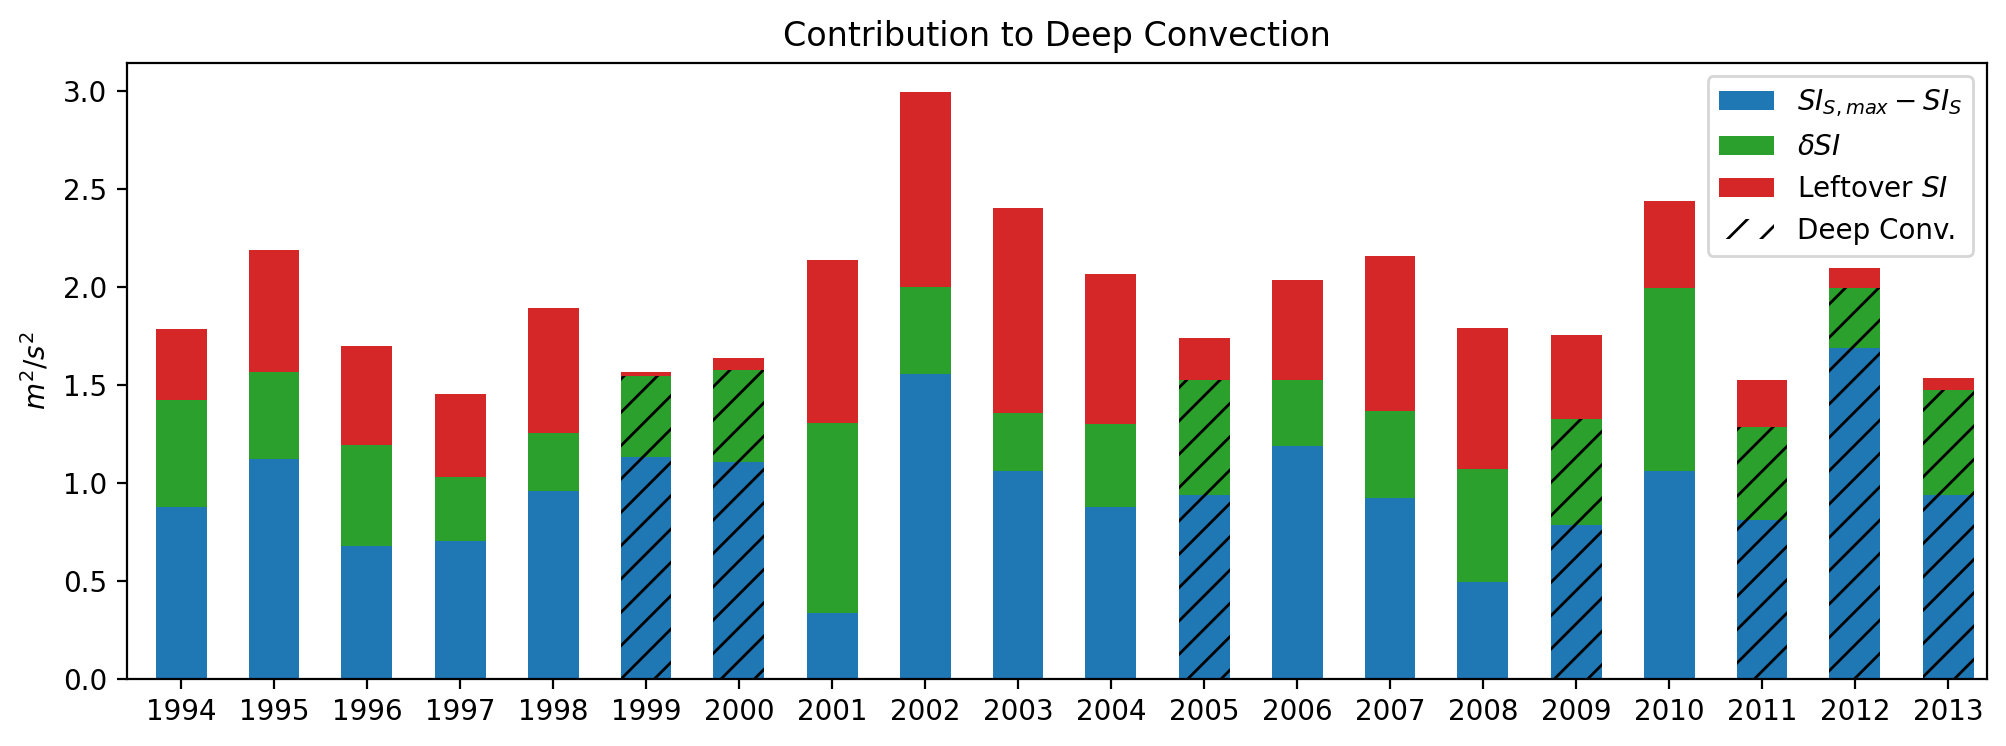

In [146]:
fig, ax = plt.subplots(figsize=(12,4), dpi=200)

bar_width = timedelta(days=200)
ax.bar(dyears, si_s_max-si_s_dc, width=bar_width, color='tab:blue', label='$SI_{S,max}-SI_S$')
ax.bar(dyears, -dsi_dc, width=bar_width, color='tab:green', bottom=si_s_max-si_s_dc, label='$\\delta SI$')
ax.bar(dyears, si_s_max - (si_s_max-si_s_dc) + dsi_dc, width=bar_width, color='tab:red', bottom=(si_s_max-si_s_dc) - dsi_dc, label='Leftover $SI$')

ax.bar(dyears[ind_dc], (si_s_max-si_s_dc)[ind_dc], width=bar_width, color='none', hatch='//', label='Deep Conv.')
ax.bar(dyears[ind_dc], -1*dsi_dc[ind_dc], width=bar_width, color='none', bottom=(si_s_max-si_s_dc)[ind_dc], hatch='//')

fmt_year = mdates.YearLocator()
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_xlim(beg, end)

ax.set_ylabel('$m^2/s^2$')
ax.legend()

ax.set_title('Contribution to Deep Convection')

plt.show()

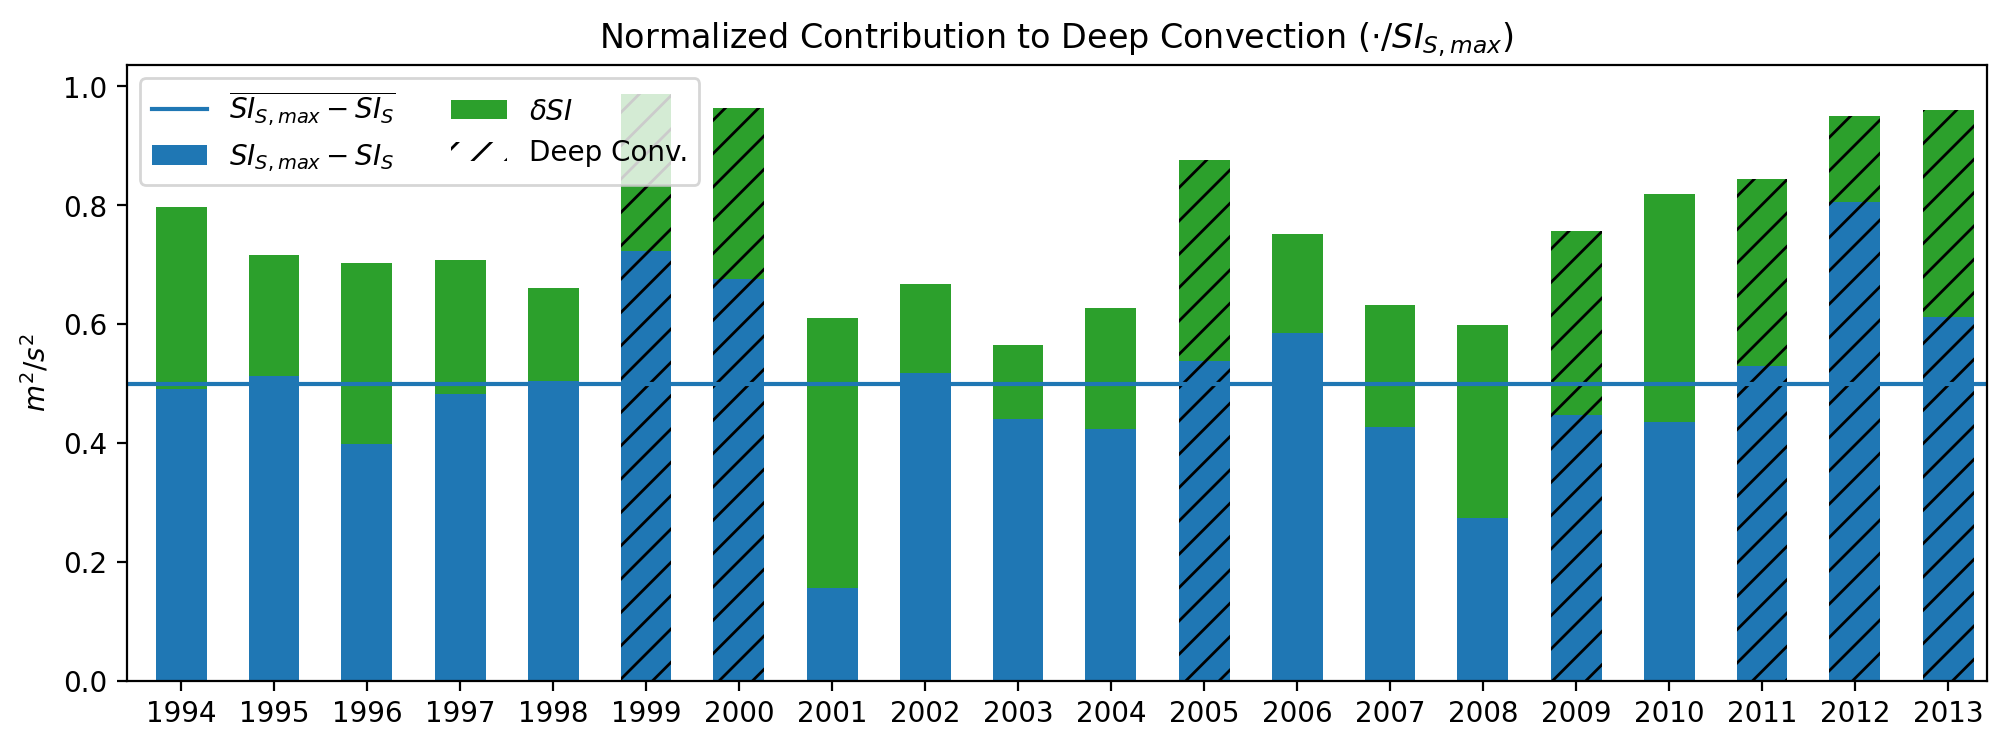

In [140]:
fig, ax = plt.subplots(figsize=(12,4), dpi=200)

ax.axhline(((si_s_max-si_s_dc)/si_s_max).mean(), color='tab:blue', label='$\overline{SI_{S,max} - SI_S}$')

bar_width = timedelta(days=200)
ax.bar(dyears, (si_s_max-si_s_dc)/si_s_max, width=bar_width, color='tab:blue', label='$SI_{S,max}-SI_S$')
ax.bar(dyears, -dsi_dc/si_s_max, width=bar_width, color='tab:green', bottom=(si_s_max-si_s_dc)/si_s_max, label='$\\delta SI$')

ax.bar(dyears[ind_dc], ((si_s_max-si_s_dc)/si_s_max)[ind_dc], width=bar_width, color='none', hatch='//', label='Deep Conv.')
ax.bar(dyears[ind_dc], (-1*dsi_dc/si_s_max)[ind_dc], width=bar_width, color='none', bottom=((si_s_max-si_s_dc)/si_s_max)[ind_dc], hatch='//')

fmt_year = mdates.YearLocator()
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_xlim(beg, end)

ax.set_ylabel('$m^2/s^2$')
ax.legend(ncol=2)

ax.set_title('Normalized Contribution to Deep Convection $(\cdot/SI_{S,max})$')

plt.show()

In [112]:
print('Average seasonal contribution:', round(((si_s_max-si_s_dc)/si_s_max).mean(),3),'%')

Average seasonal contribution: 0.499 %


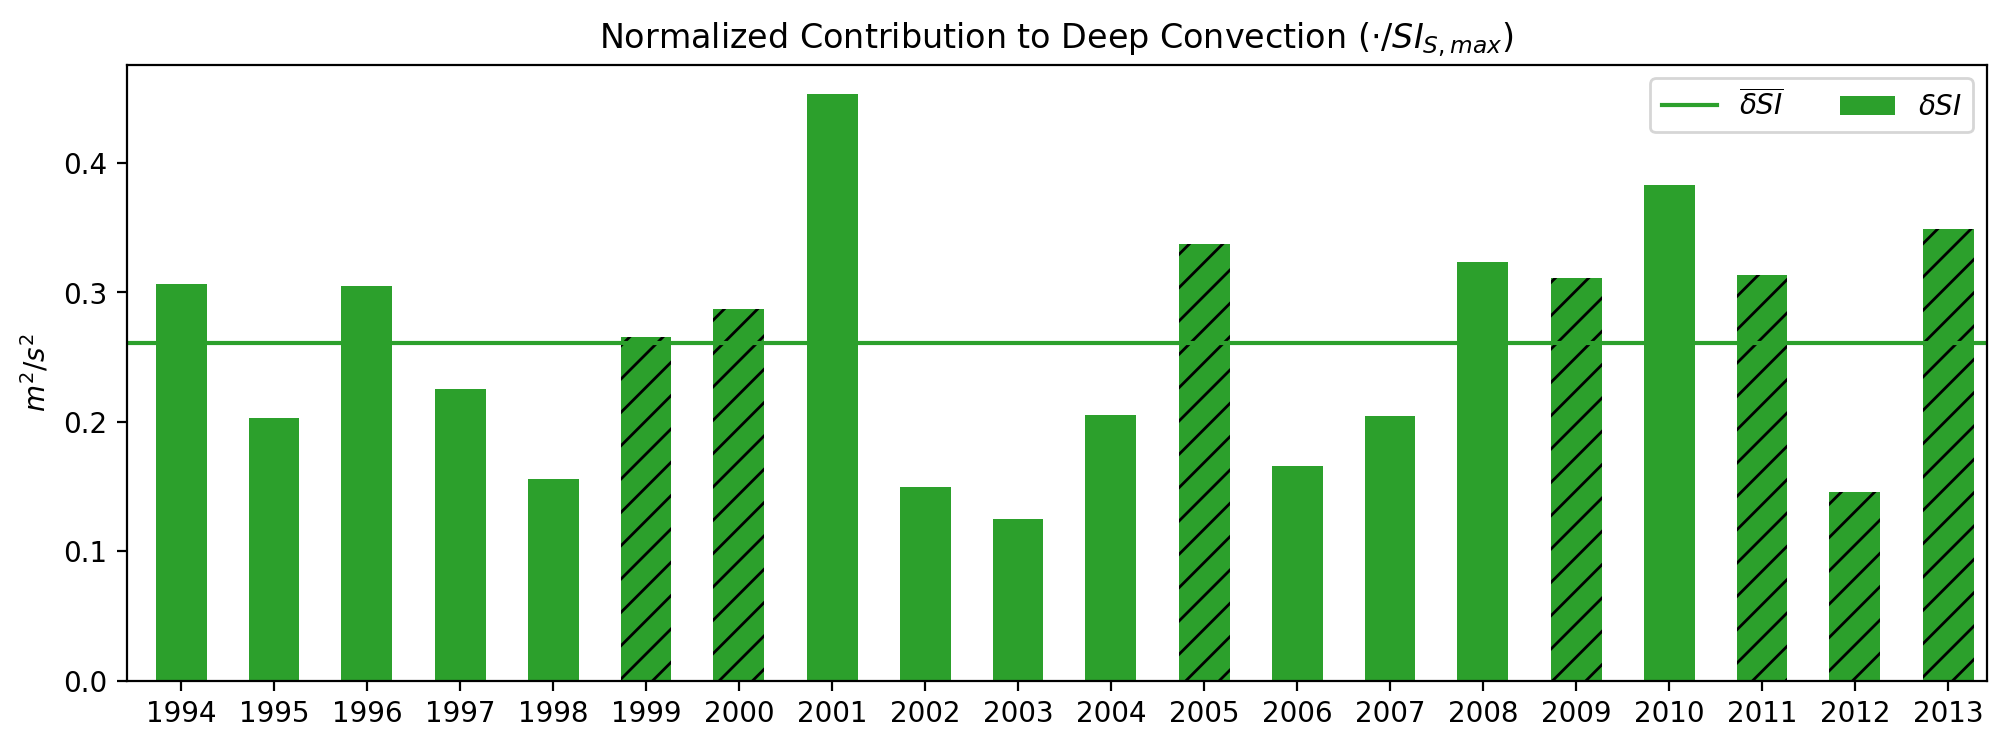

In [141]:
fig, ax = plt.subplots(figsize=(12,4), dpi=200)

ax.axhline(((-dsi_dc)/si_s_max).mean(), color='tab:green', label='$\overline{\delta SI}$')

bar_width = timedelta(days=200)
ax.bar(dyears, -dsi_dc/si_s_max, width=bar_width, color='tab:green', label='$\\delta SI$')

ax.bar(dyears[ind_dc], (-1*dsi_dc/si_s_max)[ind_dc], width=bar_width, color='none', hatch='//')

fmt_year = mdates.YearLocator()
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_xlim(beg, end)

ax.set_ylabel('$m^2/s^2$')
ax.legend(ncol=2)

ax.set_title('Normalized Contribution to Deep Convection $(\cdot/SI_{S,max})$')

plt.show()

In [142]:
print('Average anomaly contribution:', round(((-dsi_dc)/si_s_max).mean(),3),'%')

Average anomaly contribution: 0.261 %


## Key Points

- 6 of the 7 deep convection years have a seaonal destratification contribution that is greater than the 20 year average seasonal contribution.
- 12 of the 13 non deep convection years have roughly the average or less in terms of seasonal destratification contribution.
- 6 of the 7 deep convection years have an anomaly contribution at or above the 20 year average.
    - 6 of the deep convection years of the 20 years are above average
    - 5 of the non deep convection years of the 20 years are above average
        - all of these years had below average seasonal contribution